## Machine learning Final Project

### Project 1
### Mercedes-Benz Greener Manufacturing

### DESCRIPTION
Reduce the time a Mercedes-Benz spends on the test bench.

Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Following actions should be performed:

1. If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
2. Check for null and unique values for test and train sets.
3. Apply label encoder.
4. Perform dimensionality reduction.
5. Predict your test_df values using XGBoost.

### Data overview: 
* This dataset contains an anonymized set of variables, each representing a custom feature in mercedes car. The labelled 'y' represents the time, the car took to pass the testing for each variable. Here we have two CSV files, train.csv--> containing 4209 rows and 378 columns with labels and test.csv--> containing 4209 rows and 377 columns without labels.

* Our Aim is to predict the testing time which is a continuous variable, with labelled dataset, hence we can conclude that it is a supervised machine learning problem with regression machine learning technique.

* Performance Metric:  To evaluate the performance of the predcitive model, we can make use of performance metrics such as R2(R Square--Coefficient of determination) for evaluation. R2 gives us the percentage variation in 'y'(ouput variable--time taken) expalined by the input variables x(multiple input features). We can also check for MEAN SQUARED ERROR for robsutness of the model.

### Library Imports

In [1]:
#Import necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import xgboost as xgb, time

### Exploratory Data Analysis and Pre-processing

In [2]:
#Load the train dataset
train_ds = pd.read_csv('train.csv')

In [3]:
#Print first few rows of train dataset
train_ds.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Print the shape and size of the tain dataset
print('The shape of train dataset:',train_ds.shape)
print('The size of train dataset: ',train_ds.size)

The shape of train dataset: (4209, 378)
The size of train dataset:  1591002


In [5]:
#Load the test dataset
test_ds = pd.read_csv('test.csv')

In [6]:
#Print first few rows of test dataset
test_ds.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
#Print the shape and size of the tain dataset
print('The shape of test dataset:',test_ds.shape)
print('The size of test dataset: ',test_ds.size)

The shape of test dataset: (4209, 377)
The size of test dataset:  1586793


In [8]:
#print the int,float and object values of train dataset
print('The integer values: \n', train_ds.select_dtypes(include='int64').columns)
print('\nThe float values: \n', train_ds.select_dtypes(include='float64').columns)
print('\nThe object categorical values: \n', train_ds.select_dtypes(include='object').columns)

The integer values: 
 Index(['ID', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=369)

The float values: 
 Index(['y'], dtype='object')

The object categorical values: 
 Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')


#### Check for missing values in a whole dataset

In [9]:
print('Missing values in a train dataset: ',train_ds.isna().any().sum())
print('Missing values in a test dataset: ',test_ds.isna().any().sum())

Missing values in a train dataset:  0
Missing values in a test dataset:  0


#### Check for duplicates in an entire dataset

In [10]:
print('Duplicate rows in a train dataset: ',train_ds.duplicated().sum())
print('Duplicate rows in a test dataset: ',test_ds.duplicated().sum())

Duplicate rows in a train dataset:  0
Duplicate rows in a test dataset:  0


#### Note: There are no missing values and duplicates in the dataset.

### Statistical description of target variable

<AxesSubplot:xlabel='y'>

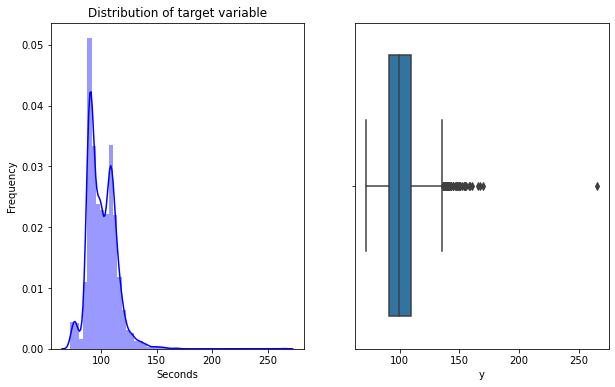

In [11]:
#Check the distribution of target variable ['y']
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.distplot(train_ds['y'],bins=50,color='blue')
plt.title('Distribution of target variable')
plt.xlabel('Seconds')
plt.ylabel('Frequency')

#Check for the presence of outlier in target variable
plt.subplot(122)
sns.boxplot(train_ds['y'])

In [12]:
#Statistical Analysis of target variable
train_ds.y.describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

#### Note: Form the above plots we infer that target value has a distribution of 72 to 140 seconds. The first and third quartile range from 90 to 109 seconds. The presence of outlier from 140 seconds. Let's consider a threshold value of 140 and all the data points above those will be removed as outliers.

In [13]:
#Removing outlier from target variable 'y' with threshold value as 140 using IQR capping
q1 = train_ds['y'].quantile(0.25)
q3 = train_ds['y'].quantile(0.75)
iqr = q3-q1
ub = q3 + (1.5 * iqr)
lb = q1 - (1.5 * iqr)
train_ds['y'] = np.where(train_ds['y']>ub ,ub, np.where(train_ds['y'] <lb, lb, train_ds['y']))

<AxesSubplot:xlabel='y'>

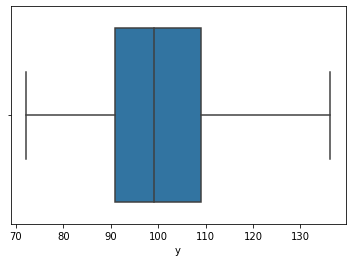

In [14]:
#Recheck the distribution of target variable
sns.boxplot(train_ds['y'])

In [15]:
#Statistical analysis of target variable
train_ds['y'].describe()

count    4209.000000
mean      100.526180
std        12.025646
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       136.295000
Name: y, dtype: float64

### Analysis of Independent features of train data

In [16]:
print(train_ds.dtypes.value_counts())
print('')
print(train_ds.dtypes[train_ds.dtypes=='object'])
print('')
print(train_ds.dtypes[train_ds.dtypes=='float'])

int64      369
object       8
float64      1
dtype: int64

X0    object
X1    object
X2    object
X3    object
X4    object
X5    object
X6    object
X8    object
dtype: object

y    float64
dtype: object


#### Note: We have 368 binary features(excluding 'ID' variable and target 'y' variable) and 8 categorical features

In [17]:
#print the unique values of all categorical features
obj = train_ds.dtypes[train_ds.dtypes=='object'].index
for i in obj:
    print(i, train_ds[i].unique())

X0 ['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
X1 ['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
X2 ['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
X3 ['a' 'e' 'c' 'f' 'd' 'b' 'g']
X4 ['d' 'b' 'c' 'a']
X5 ['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
X6 ['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']
X8 ['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 'm' 'k' 'd' 'i' 'v' 'j' 'b' 'q' 'w' 'g'
 'y' 'l' 'f' 'u' 'r' 't' 'c']


In [18]:
train_ds[obj].head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


### Let's Boxplot each of categorical feature for distribution

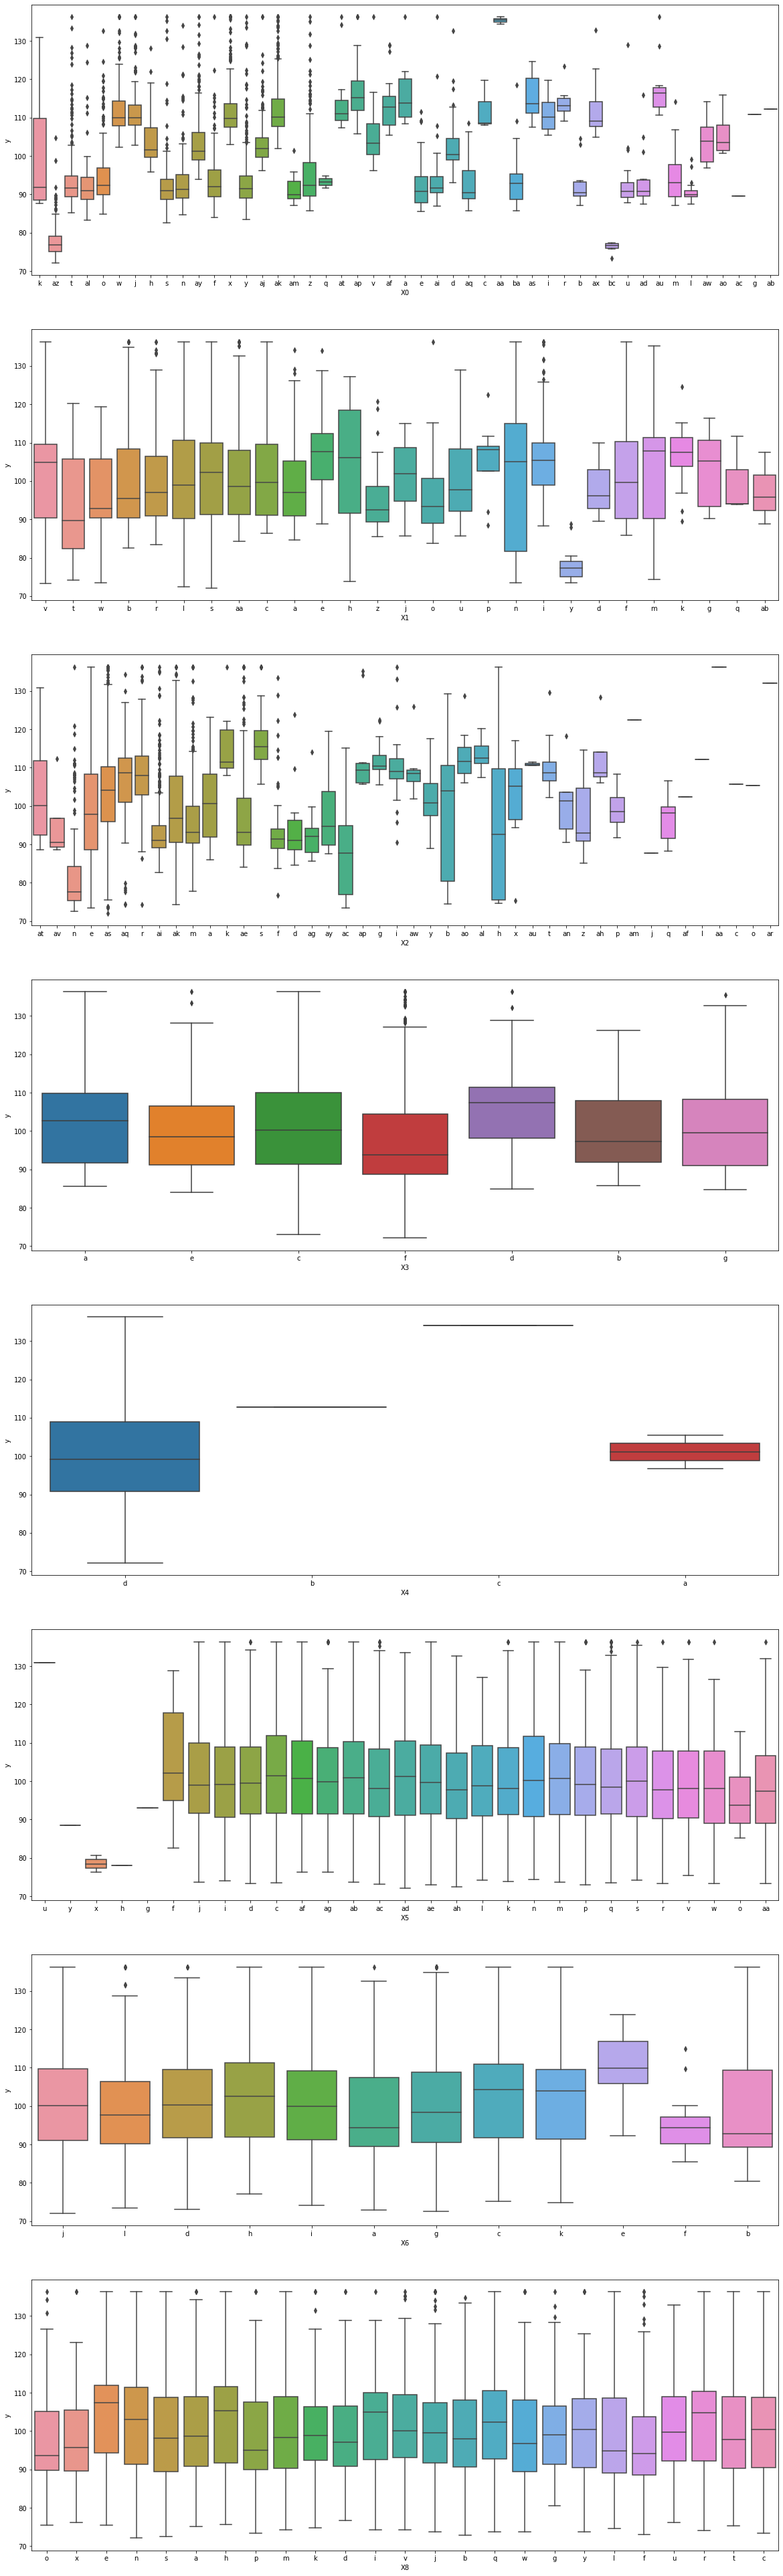

In [19]:
fig,ax = plt.subplots(len(obj), figsize=(20,70))

for i, col in enumerate(obj):
    sns.boxplot(x=col, y='y', data=train_ds, ax=ax[i])

### Note:
From the above charts we can infer that, the variables X3, X5, X6, X8 have kind of similar distribution values,these variables along with X0 and X1 have lot of variance.Feature X4 seems to have a very less information with regard to output variable as it's variance is quiet low.

### Analysis of Numeric features with Binary values

In [20]:
bin_values = train_ds.dtypes[train_ds.dtypes=='int64'].index
train_ds[bin_values].head()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,6,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Drop the columns with zero variance

In [21]:
#fetch all the numeric features from train dataset
num_fea = train_ds.dtypes[train_ds.dtypes=='int64'].index[1:]
zero_var = []
for i in num_fea:
    if(train_ds[i].var() == 0):
        print(i, train_ds[i].var())
        zero_var.append(i)

X11 0.0
X93 0.0
X107 0.0
X233 0.0
X235 0.0
X268 0.0
X289 0.0
X290 0.0
X293 0.0
X297 0.0
X330 0.0
X347 0.0


### Note: 
We received the variables with zero variance, we can drop them from the train dataset(as the variables with zero variance does not aid in explaining the variability in the output variable), so that performance of the model will not be affected.

In [22]:
train_ds = train_ds.drop(columns=zero_var, axis=1)

In [23]:
list(zero_var)

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [24]:
#Check the shape of the train dataset after dropping the 12 features as metioned above
train_ds.shape

(4209, 366)

### EDA Summary:
* There are no NaN values in a dataset
* No duplicates in the dataset
* Removed zero variance binary features ['X11','X93','X107','X233','X235','X268','X289','X290','X293','X297','X330','X347'] from train dataset.
* Performed outlier treatment on target variable 'y' (i.e Time taken in seconds) by using Inter Quartile Range capping with upper threshold as 136

### Analysis of Test Dataset

In [25]:
#Shape of test dataset
print(test_ds.shape)

(4209, 377)


In [26]:
test_ds.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [27]:
print('Total Object in test dataset:',test_ds.dtypes[test_ds.dtypes=='object'].count())
print(test_ds.dtypes[test_ds.dtypes=='object'])

Total Object in test dataset: 8
X0    object
X1    object
X2    object
X3    object
X4    object
X5    object
X6    object
X8    object
dtype: object


In [28]:
print('Total integer values in test dataset:',test_ds.dtypes[test_ds.dtypes=='int64'].count())
print(test_ds.dtypes[test_ds.dtypes=='int64'])

Total integer values in test dataset: 369
ID      int64
X10     int64
X11     int64
X12     int64
X13     int64
        ...  
X380    int64
X382    int64
X383    int64
X384    int64
X385    int64
Length: 369, dtype: object


In [29]:
test_ds.columns

Index(['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=377)

In [30]:
#let's drop the variables X11','X93','X107','X233','X235','X268','X289','X290','X293','X297','X330','X347'] as we have dropped from train dataset
test_ds = test_ds.drop(columns=zero_var, axis=1)

In [31]:
test_ds.shape

(4209, 365)

* The shape of test dataset has reduced from 377 features to 368 features after dropping the variables.

### Label Encoder for encoding categorical Features of train dataset

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le = LabelEncoder()

In [34]:
#Drop the target variable and ID variable from train dataset
train_ds_feature = train_ds.drop(columns=['y','ID'])
train_ds_target = train_ds[['y']]

In [35]:
#Print the hape of feature and target
print('Shape of features dataset: ', train_ds_feature.shape)
print('Shape of target dataset: ', train_ds_target.shape)

Shape of features dataset:  (4209, 364)
Shape of target dataset:  (4209, 1)


In [36]:
train_ds_feature.describe(include='object')

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,w,g,j
freq,360,833,1659,1942,4205,231,1042,277


In [37]:
#Transforming categorical features
train_ds_feature['X0'] = le.fit_transform(train_ds_feature['X0'])
train_ds_feature['X1'] = le.fit_transform(train_ds_feature['X1'])
train_ds_feature['X2'] = le.fit_transform(train_ds_feature['X2'])
train_ds_feature['X3'] = le.fit_transform(train_ds_feature['X3'])
train_ds_feature['X4'] = le.fit_transform(train_ds_feature['X4'])
train_ds_feature['X5'] = le.fit_transform(train_ds_feature['X5'])
train_ds_feature['X6'] = le.fit_transform(train_ds_feature['X6'])
train_ds_feature['X8'] = le.fit_transform(train_ds_feature['X8'])

In [38]:
#Let's check the train dataframe after label encoding transformation on categorcial variables
train_ds_feature.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


### Pre-Prcocessing for test dataset

In [39]:
#Drop the column ID from test dataset
test_ds = test_ds.drop(columns='ID')
test_ds.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
1,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0
2,az,v,as,f,d,a,j,j,0,0,...,0,0,0,1,0,0,0,0,0,0
3,az,l,n,f,d,z,l,n,0,0,...,0,0,0,1,0,0,0,0,0,0
4,w,s,as,c,d,y,i,m,0,0,...,1,0,0,0,0,0,0,0,0,0


In [40]:
test_ds.describe(include='object')

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,49,27,45,7,4,32,12,25
top,ak,aa,as,c,d,v,g,e
freq,432,826,1658,1900,4203,246,1073,274


In [41]:
#shape of the test dataset
test_ds.shape

(4209, 364)

### Encode the testing dataset

In [42]:
#Making a deep copy of test dataset
X_test = test_ds.copy()

In [43]:
X_test.shape

(4209, 364)

In [44]:
X_test.select_dtypes(include='object').head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,az,v,n,f,d,t,a,w
1,t,b,ai,a,d,b,g,y
2,az,v,as,f,d,a,j,j
3,az,l,n,f,d,z,l,n
4,w,s,as,c,d,y,i,m


In [45]:
#Transforming categorical features
X_test['X0'] = le.fit_transform(X_test['X0'])
X_test['X1'] = le.fit_transform(X_test['X1'])
X_test['X2'] = le.fit_transform(X_test['X2'])
X_test['X3'] = le.fit_transform(X_test['X3'])
X_test['X4'] = le.fit_transform(X_test['X4'])
X_test['X5'] = le.fit_transform(X_test['X5'])
X_test['X6'] = le.fit_transform(X_test['X6'])
X_test['X8'] = le.fit_transform(X_test['X8'])

In [46]:
X_test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


In [47]:
#making copy of train_ds_feature and train_ds_target for easy reference
X_train = train_ds_feature
y_train = train_ds_target

### Feature Engineering

* Split the train dataset 'X_train' into train and validation datasets respectively.

In [48]:
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

In [49]:
#print the shape of train and validation datasets
print('Train set: ', X_train.shape)
print('Validation set: ',X_cv.shape)
print('y_train set: ',y_train.shape)
print('y_validation set: ',y_cv.shape)

Train set:  (3367, 364)
Validation set:  (842, 364)
y_train set:  (3367, 1)
y_validation set:  (842, 1)


### Perform Dimensionality Reduction using PCA

In [50]:
from sklearn.decomposition import PCA

In [51]:
#Instantiate an object of PCA
pca = PCA(n_components=0.95)

In [52]:
#fit pca object of PCA on X_train
pca.fit(X_train)

PCA(n_components=0.95)

In [53]:
#Transform the train,validation and test dataset
X_train_transformed = pca.transform(X_train)
X_cv_transformed = pca.transform(X_cv)
X_test_transformed = pca.transform(X_test)

In [54]:
#Print the shape of tranformed datasets
print('X_train transformed: ',X_train_transformed.shape)
print('X_cv transformed: ',X_cv_transformed.shape)
print('X_test transformed: ',X_test_transformed.shape)

X_train transformed:  (3367, 6)
X_cv transformed:  (842, 6)
X_test transformed:  (4209, 6)


## Build the model using train dataset
* Using RandomizedSearchCV for best hyper-parameters and then building the XGBoost model

In [55]:
#Instantiate an object of XGBoost Regressor
xgb_regressor = xgb.XGBRegressor()

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [57]:
params = {'learning_rate':[0.001,0.01,0.05,0.1,1],
         'n_estimators':[100,150,200,500],
         'max_depth':[2,3,5,10],
          'colsample_bytree':[0.1,0.5,0.7,1], 
         'sub_sample':[0.2,0.3,0.5,1],
         'gamma':[1e-2,1e-3,0,0.1,0.01,0.5,1],
         'reg_alpha':[1e-5,1e-3,1e-1,1,1e1]}

In [58]:
gcv_random = RandomizedSearchCV(xgb_regressor, params, cv=3, n_jobs= -1, scoring='r2')

In [59]:
gcv_random.fit(X_train_transformed, y_train)

[12:46:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validate

In [60]:
best_max_depth =  gcv_random.best_estimator_.get_params()['max_depth']
best_n_estimators = gcv_random.best_estimator_.get_params()['n_estimators']
best_colsample_bytree = gcv_random.best_estimator_.get_params()['colsample_bytree']
best_sub_sample = gcv_random.best_estimator_.get_params()['sub_sample']
best_reg_alpha = gcv_random.best_estimator_.get_params()['reg_alpha']
best_gamma = gcv_random.best_estimator_.get_params()['gamma']
best_learning_rate = gcv_random.best_estimator_.get_params()['learning_rate']

In [61]:
#Print The best parameters
print('Best max_depth:', best_max_depth)
print('Best n_estimators:', best_n_estimators)
print('Best colsample_bytree:', best_colsample_bytree)
print('Best sub_sample:', best_sub_sample)
print('Best reg_alpha:', best_reg_alpha)
print('Best gamma:', best_gamma)
print('Best learning_rate:', best_learning_rate)

Best max_depth: 3
Best n_estimators: 100
Best colsample_bytree: 0.7
Best sub_sample: 0.5
Best reg_alpha: 10.0
Best gamma: 0
Best learning_rate: 0.1


In [62]:
xgb_reg1 = xgb.XGBRegressor(n_estimators = best_n_estimators,
               learning_rate = best_learning_rate,
               max_depth = best_max_depth,
               subsample = best_sub_sample,
               gamma = best_gamma,
               reg_alpha = best_reg_alpha,
                colsample_bytree = best_colsample_bytree,
                  random_state=42,n_jobs=-1)

In [63]:
#Fit the model on train data
xgb_reg1.fit(X_train_transformed, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=10.0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [64]:
#Predict on validation dataset
cv_pred = xgb_reg1.predict(X_cv_transformed)
cv_score = r2_score(y_cv, cv_pred)
cv_mse = mean_squared_error(y_cv, cv_pred)
cv_rmse = np.sqrt(mean_squared_error(y_cv, cv_pred))
print(f'For max_depth= {best_max_depth} CV R2 = {cv_score}')
print('Mean Squared error: ', cv_mse)
print('RMSE: ', cv_rmse)

For max_depth= 3 CV R2 = 0.36412642544553964
Mean Squared error:  91.87293717062916
RMSE:  9.585037150195568


### Test Dataset Prediction using XGBoost

In [65]:
test_pred = xgb_reg1.predict(X_test_transformed)
test_pred

array([ 81.38319 , 100.231125,  96.52871 , ..., 102.79422 , 107.831474,
       103.06002 ], dtype=float32)

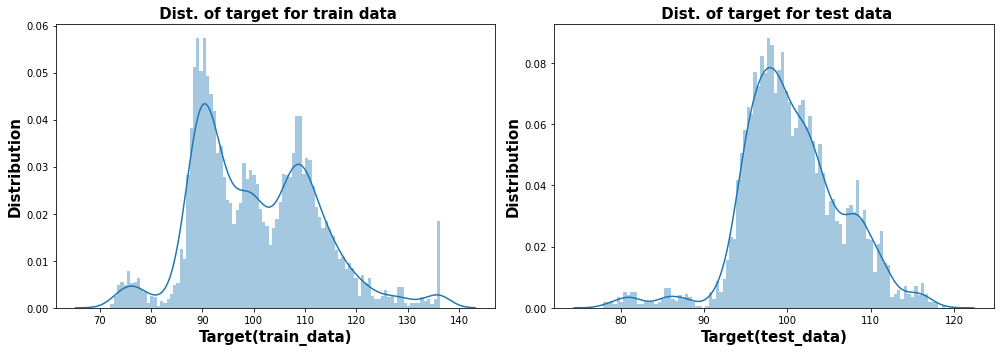

In [66]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

train_plot = sns.distplot(train_ds_target[train_ds_target<200], bins=100, kde=True, ax=ax[0])
train_plot.set_xlabel('Target(train_data)', weight='bold', size=15)
train_plot.set_ylabel('Distribution', weight='bold', size=15)
train_plot.set_title(' Dist. of target for train data', weight='bold', size=15)

test_plot = sns.distplot(test_pred[test_pred<200], bins=100, kde=True, ax=ax[1])
test_plot.set_xlabel('Target(test_data)', weight='bold', size=15)
test_plot.set_ylabel('Distribution', weight='bold', size=15)
test_plot.set_title(' Dist. of target for test data', weight='bold', size=15)

plt.tight_layout()